In [ ]:
# para conectar con Drive
from google.colab import drive

drive.mount('/content/drive/')

PATH = '/content/drive/My Drive/ML_Practicas_2020/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
#Descargar los datos de fashion_mnist


import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Verificación carga completa:
## Training dataset
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_train Dimensiones:", x_train.ndim, "y_train Dimensiones:", y_train.ndim)
print("x_train Tipo de Dato:", x_train.dtype, "y_train Tipo de Dato:", y_train.dtype)
print("x_train Tamaño:", x_train.size, "y_train Tamaño:", y_train.size)

print('----------------------------------------------------------')

## Test dataset
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)
print("x_test Dimensiones:", x_test.ndim, "y_test Dimensiones:", y_test.ndim)
print("x_test Tipo de Dato:", x_test.dtype, "y_test Tipo de Dato:", y_test.dtype)
print("x_test Tamaño:", x_test.size, "y_test Tamaño:", y_test.size)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_train Dimensiones: 3 y_train Dimensiones: 1
x_train Tipo de Dato: uint8 y_train Tipo de Dato: uint8
x_train Tamaño: 47040000 y_train Tamaño: 60000
----------------------------------------------------------
x_test shape: (10000, 28, 28) y_test shape: (10000,)
x_test Dimensiones: 3 y_test Dimensiones: 1
x_test Tipo de Dato: uint8 y_test Tipo de Dato: uint8
x_test Tamaño: 7840000 y_test Tamaño: 10000


60000 train set
10000 test set
y = 0 T-shirt/top


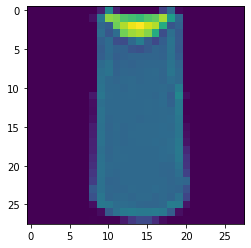

In [ ]:
# Número total de conjunto de dato entrenamiento y prueba

print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Defnición de las etiquetas (Creación Diccionario)
fashion_mnist_labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
                        5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

img_index = 2
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])

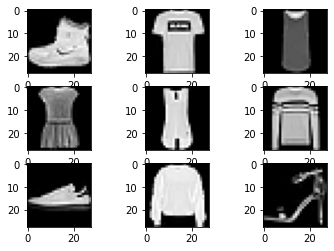

In [ ]:
# Gráfico 9 primeras imágenes del training dataset.
### Como hay 10 clases (0 -9 class labels) defino el subplot dentro de ese rango

for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
 # show the figure
plt.show()

In [ ]:
# Normalizar la data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [ ]:
#Verificación Normalización; C/imagen debe quedar rango 0-1 en ambos conjuntos de datos
np.amin(x_train)
np.amax(x_train)
np.amin(y_train)
np.amax(y_train)
print('Valor min x_train', np.amin(x_train),'Valor max x_train',np.amax(x_train),'Valor min x_test',np.amin(x_train),'Valor max x_test', np.amax(x_train))

Valor min x_train 0.0 Valor max x_train 1.0 Valor min x_test 0.0 Valor max x_test 1.0


In [ ]:
# Cantidad de imagenes por dataset
print(len(x_train))
print(len(x_test))

60000
10000


In [ ]:
# Separar el conjunto de training dataset en Entrenamiento y Validación  (# 10000 en el conjunto de validación y se mantiene los 50,000 restantes para entrenamiento)

(x_train, x_val) = x_train[10000:], x_train[:10000] 
(y_train, y_val) = y_train[10000:], y_train[:10000]

# Actualizar los datos de entrada de (28, 28) a (28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Etiquetar clase a la nueva división de la data 
from keras.utils import to_categorical

num_classes = 10

y_train =to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

#Verificación y Numero por dataset
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

print(x_train.shape[0], 'Conjunto de Entrenamiento')
print(x_val.shape[0], 'Conjunto de Validación')
print(x_test.shape[0], 'Conjunto de Test')
print("x_train Dimensiones:", x_train.ndim, "x_val Dimensiones:", x_val.ndim, "x_test Dimensiones:", x_test.ndim)

x_train shape: (50000, 28, 28, 1) y_train shape: (50000, 10)
50000 Conjunto de Entrenamiento
10000 Conjunto de Validación
10000 Conjunto de Test
x_train Dimensiones: 4 x_val Dimensiones: 4 x_test Dimensiones: 4


 Arquitectura y Definición de los Modelos 
 

In [ ]:
# Redes Neuronales Convolucionales (CNN) - Modelo Sequential ()

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import datetime

GENERADOR


In [ ]:
## GENERADOR DE IMAGEN
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 64

train_generator = train_datagen.flow(x_train, y=y_train, batch_size=batch_size)
val_generator = val_datagen.flow(x_val, y=y_val, batch_size=batch_size)
test_generator = test_datagen.flow(x_test, y=y_test, batch_size=batch_size)

In [ ]:
n_class= 10

model = Sequential()

model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(n_class, activation='softmax'))

print(model.summary()) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                432650    
Total params: 451,466
Trainable params: 451,466
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#    CONFIGURAR EL MODELO
model.compile(optimizer='adam',
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
# Entrenamiento del Modelo 

def fit_model(batch_size=64, epochs=10, callback_list=[]):
  history = model.fit(
         x_train,
         y_train,
         batch_size=batch_size,
         epochs=epochs,
         shuffle=True,
         validation_data=(x_val, y_val),
         verbose = 1,
         callbacks=callback_list)
    
  return history

In [ ]:
# Cargar en Carpeta "model_CNN11.hdf5" los pesos guardados 
model_path = PATH+"model_CNN11.hdf5"

SE AGREGA AL CALLBACK_LIST: 
MODELCHECKPOINT -
EARLYSTOPPING

In [ ]:
# CALLBACKS  
          ## ModelCheckpoint
          ## EarlyStopping

from keras.callbacks import EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)
#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

ENTRENAMIENTO

In [ ]:
history= fit_model( epochs= 500, callback_list=callback_list)

Epoch 1/500
782/782 [==============================] - ETA: 0s - loss: 0.4135 - accuracy: 0.8536
Epoch 00001: val_loss improved from inf to 0.30273, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN11.hdf5
782/782 [==============================] - 9s 11ms/step - loss: 0.4135 - accuracy: 0.8536 - val_loss: 0.3027 - val_accuracy: 0.8911
Epoch 2/500
781/782 [============================>.] - ETA: 0s - loss: 0.2680 - accuracy: 0.9057
Epoch 00002: val_loss improved from 0.30273 to 0.27124, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN11.hdf5
782/782 [==============================] - 8s 10ms/step - loss: 0.2679 - accuracy: 0.9057 - val_loss: 0.2712 - val_accuracy: 0.9040
Epoch 3/500
780/782 [============================>.] - ETA: 0s - loss: 0.2123 - accuracy: 0.9229
Epoch 00003: val_loss improved from 0.27124 to 0.25095, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN11.hdf5
782/782 [==============================] - 8s 10ms/step 

EVALUAR MODELO

In [ ]:
_, train_acc = model.evaluate(x_train, y_train, verbose=0)
_, val_acc = model.evaluate(x_val, y_val, verbose=0)
_, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc*100,2), round(val_acc*100, 2), round(test_acc*100, 2)))

Train: 94.3%
Val: 91.32%
Test: 90.65%


CURVAS


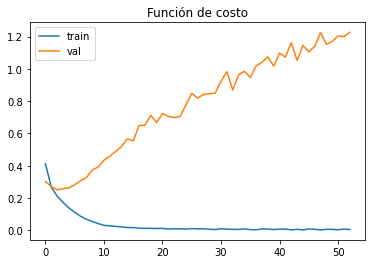

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

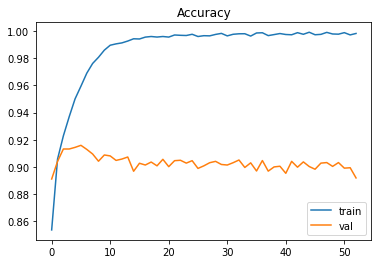

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

PREDICCIÓN


Si la predicción coincide con la etiqueta verdadera, el título será verde, de lo contrario, se muestra en rojo.


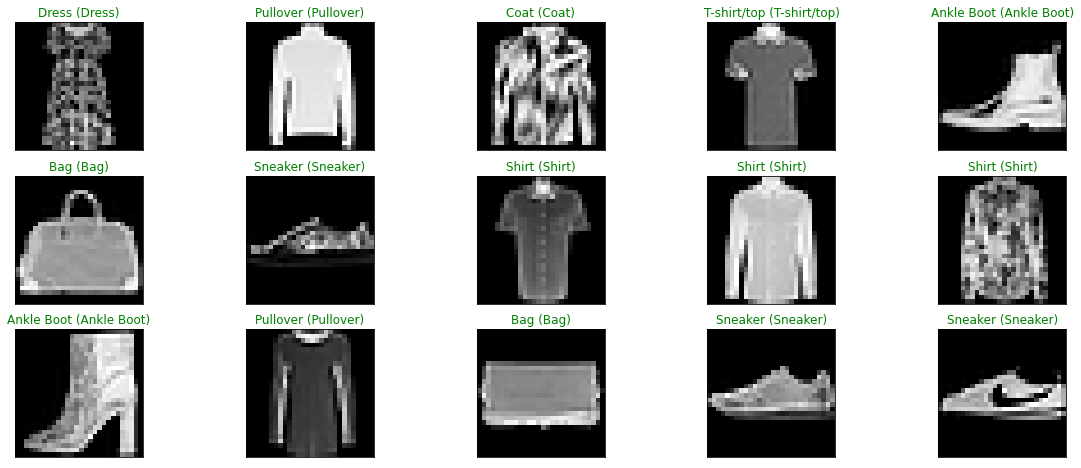

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

prediction = model.predict(x_test)

# Graficar 10 imagenes del conjunto de prueba con sus etiquetas predichas versus las realeas
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    #Descargar cada imagen
    ax.imshow(np.squeeze(x_test[index]),cmap=plt.get_cmap('gray'))
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(y_test[index])
    # Establecer el título de cada imagen
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

MODELO 2

In [ ]:
  ### DEFINICIÓN MODELO 2                                                      
from keras.layers import BatchNormalization, MaxPooling2D, Activation,Dropout

model2 = Sequential()

model2.add(Conv2D(8, kernel_size=3,padding='same', activation='relu', input_shape=(28,28,1)))
model2.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model2.add(Conv2D(64, kernel_size=3,padding='same', activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(n_class, activation='softmax'))

print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 8)         80        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

In [ ]:
## COMPLILAR MODELO2
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN22.hdf5" los pesos guardados 
model_path = PATH+"model_CNN22.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

ENTRENAMIENTO

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 500

history2 = model2.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/500
777/781 [============================>.] - ETA: 0s - loss: 0.5271 - accuracy: 0.8097
Epoch 00001: val_loss improved from inf to 1.80427, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN22.hdf5
781/781 [==============================] - 10s 12ms/step - loss: 0.5260 - accuracy: 0.8101 - val_loss: 1.8043 - val_accuracy: 0.5067
Epoch 2/500
779/781 [============================>.] - ETA: 0s - loss: 0.3434 - accuracy: 0.8745
Epoch 00002: val_loss did not improve from 1.80427
781/781 [==============================] - 10s 13ms/step - loss: 0.3434 - accuracy: 0.8745 - val_loss: 4.7585 - val_accuracy: 0.3949
Epoch 3/500
777/781 [============================>.] - ETA: 0s - loss: 0.3044 - accuracy: 0.8883
Epoch 00003: val_loss did not improve from 1.80427
781/781 [==============================] - 11s 13ms/step - loss: 0.3049 - accuracy: 0.8881 - val_loss: 7.9143 - val_accuracy: 0.2432
Epoch 4/500
780/781 [============================>.] - ETA: 0s - loss: 0.2731 - a

EVALUAR MODELO

In [ ]:
_, train_acc2 = model2.evaluate(x_train, y_train, verbose=0)
_, val_acc2 = model2.evaluate(x_val, y_val, verbose=0)
_, test_acc2 = model2.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc2*100,2), round(val_acc2*100, 2), round(test_acc2*100, 2)))

Train: 61.88%
Val: 61.32%
Test: 60.19%


CURVAS

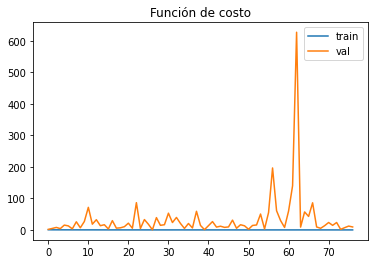

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='val')
plt.legend()
plt.show()

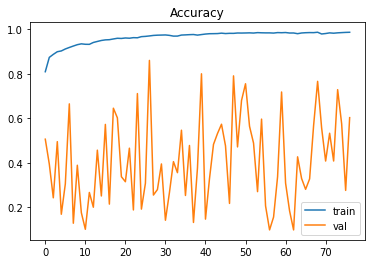

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='val')
plt.legend()
plt.show()

PREDICCIÓN

Si la predicción coincide con la etiqueta verdadera, el título será verde, de lo contrario, se muestra en rojo.

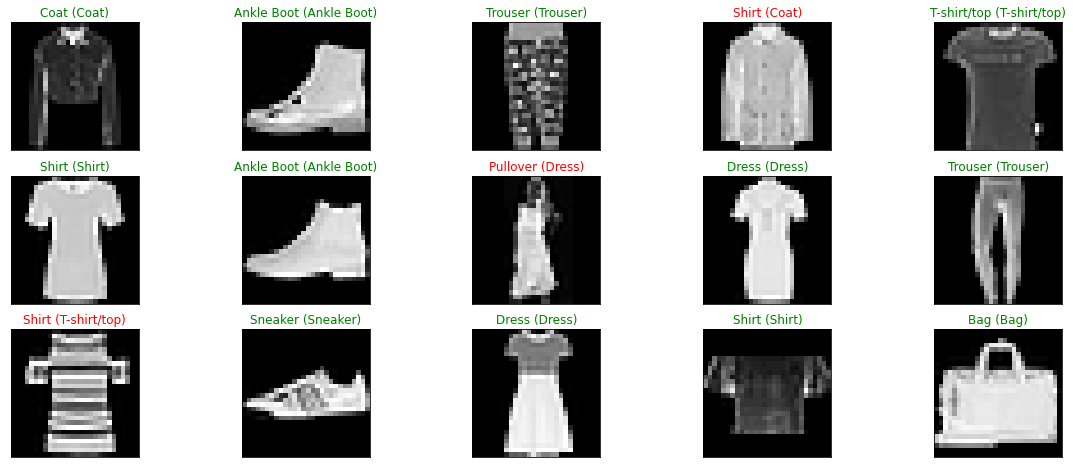

In [ ]:
prediction = model2.predict(x_test)

# Graficar 10 imagenes del conjunto de prueba con sus etiquetas predichas versus las realeas
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    #Descargar cada imagen
    ax.imshow(np.squeeze(x_test[index]),cmap=plt.get_cmap('gray'))
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(y_test[index])
    # Establecer el título de cada imagen
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

MODELO 3


In [ ]:
### DEFINICIÓN MODELO 3                                                      
from keras.layers import BatchNormalization, MaxPooling2D, Activation, Dropout

model3 = Sequential()

model3.add(Conv2D(32, kernel_size=3,padding='same', activation='relu', input_shape=(28,28,1)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(n_class, activation='softmax'))

print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [ ]:
## COMPLILAR MODELO 3
model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN33.hdf5" los pesos guardados 
model_path = PATH+"model_CNN33.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 500

history3 = model3.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/500
780/781 [============================>.] - ETA: 0s - loss: 0.4553 - accuracy: 0.8350
Epoch 00001: val_loss improved from inf to 0.39288, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN33.hdf5
781/781 [==============================] - 9s 11ms/step - loss: 0.4552 - accuracy: 0.8351 - val_loss: 0.3929 - val_accuracy: 0.8561
Epoch 2/500
781/781 [==============================] - ETA: 0s - loss: 0.3157 - accuracy: 0.8861
Epoch 00002: val_loss improved from 0.39288 to 0.29737, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN33.hdf5
781/781 [==============================] - 9s 11ms/step - loss: 0.3157 - accuracy: 0.8861 - val_loss: 0.2974 - val_accuracy: 0.8921
Epoch 3/500
777/781 [============================>.] - ETA: 0s - loss: 0.2755 - accuracy: 0.8992
Epoch 00003: val_loss improved from 0.29737 to 0.26162, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN33.hdf5
781/781 [==============================] - 9s 12ms/step 

In [ ]:
_, train_acc3 = model3.evaluate(x_train, y_train, verbose=0)
_, val_acc3 = model3.evaluate(x_val, y_val, verbose=0)
_, test_acc3 = model3.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc3*100,2), round(val_acc3*100, 2), round(test_acc3*100, 2)))

Train: 82.47%
Val: 81.53%
Test: 81.58%


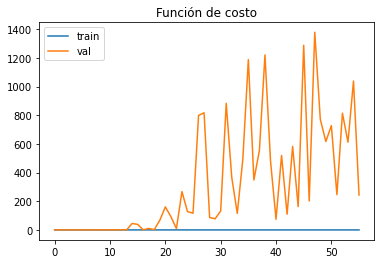

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='val')
plt.legend()
plt.show()

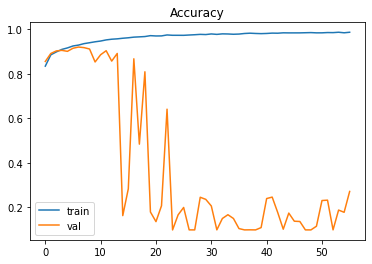

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='val')
plt.legend()
plt.show()

PREDICCIÓN

Si la predicción coincide con la etiqueta verdadera, el título será verde, de lo contrario, se muestra en rojo.

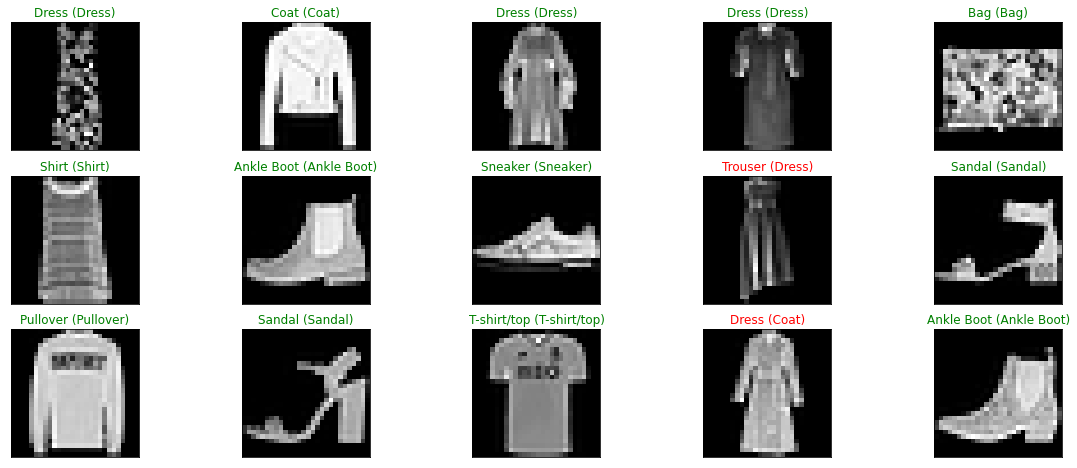

In [ ]:
prediction = model3.predict(x_test)

# Graficar 10 imagenes del conjunto de prueba con sus etiquetas predichas versus las realeas
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    #Descargar cada imagen
    ax.imshow(np.squeeze(x_test[index]),cmap=plt.get_cmap('gray'))
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(y_test[index])
    # Establecer el título de cada imagen
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

MODELO 4

In [ ]:
### DEFINICIÓN MODELO 4                                               
from keras.layers import BatchNormalization, MaxPooling2D, Activation, Dropout

model4 = Sequential()

model4.add(Conv2D(64, kernel_size=3,padding='same', activation='relu', input_shape=(28,28,1)))
model4.add(Conv2D(32, kernel_size=3,padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(16, kernel_size=3,padding='same', activation='relu'))
model4.add(Conv2D(8, kernel_size=3,padding='same', activation='relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(n_class, activation='softmax'))

print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 392)              

In [ ]:
## COMPLILAR MODELO 4
model4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN44.hdf5" los pesos guardados 
model_path = PATH+"model_CNN44.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 500

history4 = model4.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/500
778/781 [============================>.] - ETA: 0s - loss: 0.9609 - accuracy: 0.6403
Epoch 00001: val_loss improved from inf to 0.57747, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN44.hdf5
781/781 [==============================] - 10s 13ms/step - loss: 0.9595 - accuracy: 0.6407 - val_loss: 0.5775 - val_accuracy: 0.7719
Epoch 2/500
781/781 [==============================] - ETA: 0s - loss: 0.5749 - accuracy: 0.7889
Epoch 00002: val_loss improved from 0.57747 to 0.46467, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN44.hdf5
781/781 [==============================] - 10s 12ms/step - loss: 0.5749 - accuracy: 0.7889 - val_loss: 0.4647 - val_accuracy: 0.8299
Epoch 3/500
778/781 [============================>.] - ETA: 0s - loss: 0.4924 - accuracy: 0.8205
Epoch 00003: val_loss improved from 0.46467 to 0.41384, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN44.hdf5
781/781 [==============================] - 10s 13ms/st

In [ ]:
_, train_acc4 = model4.evaluate(x_train, y_train, verbose=0)
_, val_acc4 = model4.evaluate(x_val, y_val, verbose=0)
_, test_acc4 = model4.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc4*100,2), round(val_acc4*100, 2), round(test_acc4*100, 2)))

Train: 83.81%
Val: 82.37%
Test: 81.28%


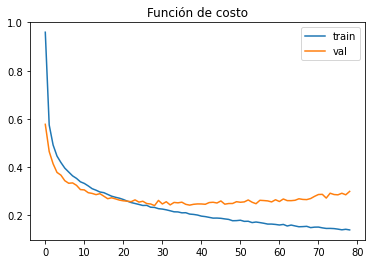

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history4.history['loss'], label='train')
plt.plot(history4.history['val_loss'], label='val')
plt.legend()
plt.show()

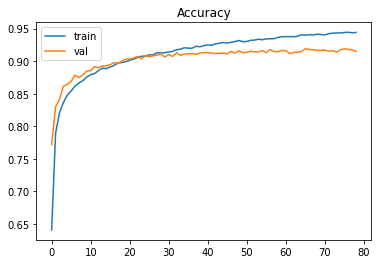

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history4.history['accuracy'], label='train')
plt.plot(history4.history['val_accuracy'], label='val')
plt.legend()
plt.show()

PREDICCIÓN

Si la predicción coincide con la etiqueta verdadera, el título será verde, de lo contrario, se muestra en rojo.

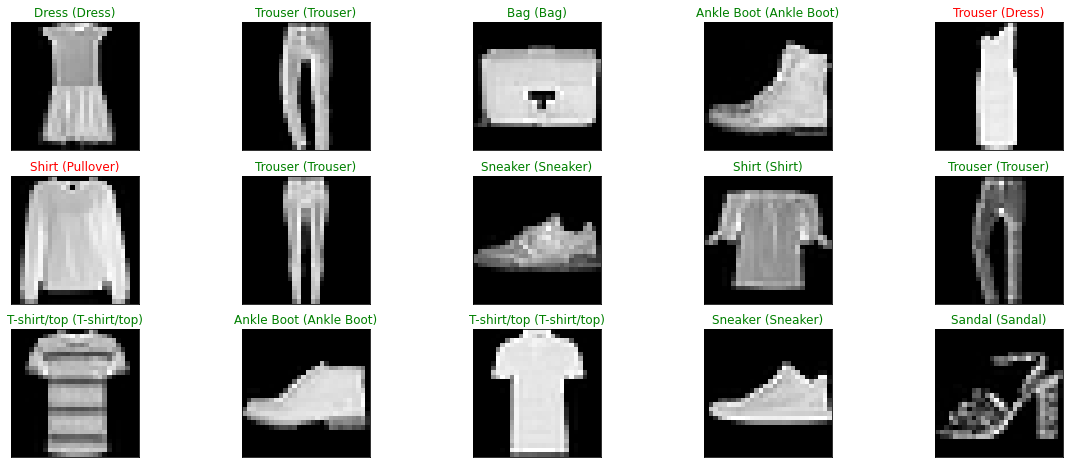

In [ ]:
prediction = model4.predict(x_test)

# Graficar 10 imagenes del conjunto de prueba con sus etiquetas predichas versus las realeas
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    #Descargar cada imagen
    ax.imshow(np.squeeze(x_test[index]),cmap=plt.get_cmap('gray'))
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(y_test[index])
    # Establecer el título de cada imagen
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

 MODELO 5

In [ ]:
### DEFINICIÓN MODELO 5                                                      
from keras.layers import  MaxPooling2D, Activation, Dropout

model5 = Sequential()

model5.add(Conv2D(16, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model5.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(32, kernel_size=3, padding='same',activation='relu'))
model5.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())
model5.add(Dense(256, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(n_class, activation='softmax'))

print(model5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 28, 28, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1568)             

In [ ]:
## COMPLILAR MODELO 5
model5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN55.hdf5" los pesos guardados 
model_path = PATH+"model_CNN55.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 500

history5 = model5.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/500
778/781 [============================>.] - ETA: 0s - loss: 2.3028 - accuracy: 0.1000
Epoch 00001: val_loss improved from inf to 2.30292, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN55.hdf5
781/781 [==============================] - 8s 11ms/step - loss: 2.3028 - accuracy: 0.1000 - val_loss: 2.3029 - val_accuracy: 0.0991
Epoch 2/500
776/781 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.0994
Epoch 00002: val_loss improved from 2.30292 to 2.30276, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN55.hdf5
781/781 [==============================] - 8s 10ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3028 - val_accuracy: 0.0942
Epoch 3/500
778/781 [============================>.] - ETA: 0s - loss: 2.3027 - accuracy: 0.0994
Epoch 00003: val_loss did not improve from 2.30276
781/781 [==============================] - 9s 11ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3028 - val_accuracy: 0.0942
Epoc

In [ ]:
_, train_acc5 = model5.evaluate(x_train, y_train, verbose=0)
_, val_acc5 = model5.evaluate(x_val, y_val, verbose=0)
_, test_acc5 = model5.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc5*100,2), round(val_acc5*100, 2), round(test_acc5*100, 2)))

Train: 21.88%
Val: 22.24%
Test: 21.79%


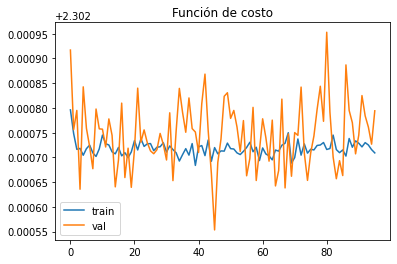

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history5.history['loss'], label='train')
plt.plot(history5.history['val_loss'], label='val')
plt.legend()
plt.show()

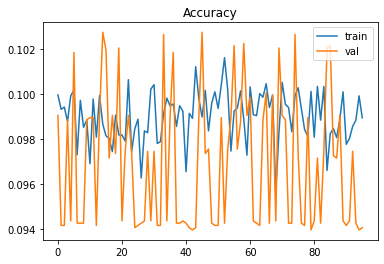

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history5.history['accuracy'], label='train')
plt.plot(history5.history['val_accuracy'], label='val')
plt.legend()
plt.show()

PREDICCIÓN

Si la predicción coincide con la etiqueta verdadera, el título será verde, de lo contrario, se muestra en rojo

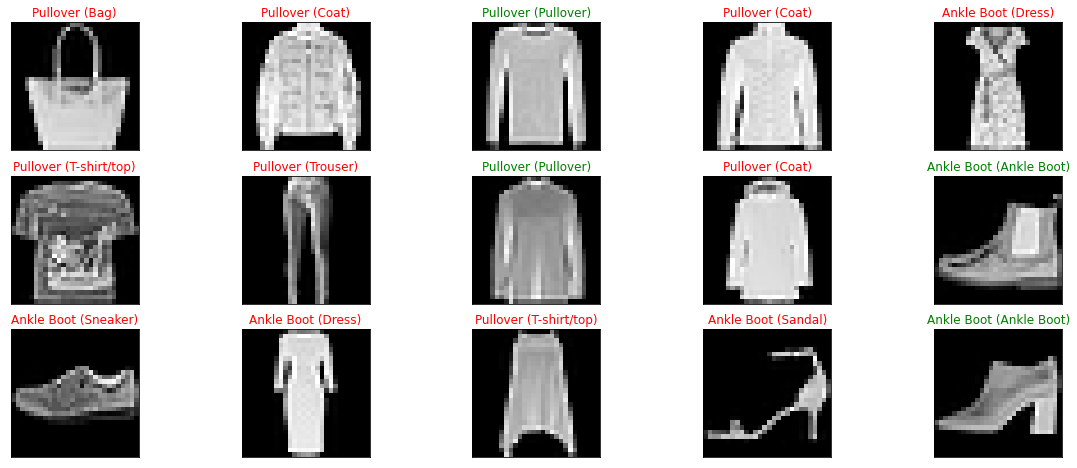

In [ ]:
prediction = model5.predict(x_test)

# Graficar 10 imagenes del conjunto de prueba con sus etiquetas predichas versus las realeas
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    #Descargar cada imagen
    ax.imshow(np.squeeze(x_test[index]),cmap=plt.get_cmap('gray'))
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(y_test[index])
    # Establecer el título de cada imagen
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

MODELO 6

In [ ]:
### DEFINICIÓN MODELO 6                                                     
from keras.layers import  MaxPooling2D, Activation, Dropout

model6 = Sequential()

model6.add(Conv2D(64, kernel_size=3,padding='same', activation='relu', input_shape=(28,28,1)))
model6.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model6.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())
model6.add(Dense(256, activation='relu'))
model6.add(Dropout(0.5))
model6.add(Dense(n_class, activation='softmax'))

print(model6.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        18464     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1568)             

In [ ]:
## COMPLILAR MODELO5
model6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN66.hdf5" los pesos guardados 
model_path = PATH+"model_CNN66.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 500

history6 = model6.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/500
781/781 [==============================] - ETA: 0s - loss: 0.9868 - accuracy: 0.6270
Epoch 00001: val_loss improved from inf to 0.52567, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN66.hdf5
781/781 [==============================] - 13s 16ms/step - loss: 0.9868 - accuracy: 0.6270 - val_loss: 0.5257 - val_accuracy: 0.7959
Epoch 2/500
778/781 [============================>.] - ETA: 0s - loss: 0.5242 - accuracy: 0.8093
Epoch 00002: val_loss improved from 0.52567 to 0.41657, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN66.hdf5
781/781 [==============================] - 13s 17ms/step - loss: 0.5242 - accuracy: 0.8093 - val_loss: 0.4166 - val_accuracy: 0.8494
Epoch 3/500
778/781 [============================>.] - ETA: 0s - loss: 0.4542 - accuracy: 0.8353
Epoch 00003: val_loss improved from 0.41657 to 0.38586, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN66.hdf5
781/781 [==============================] - 13s 17ms/st

In [ ]:
_, train_acc6 = model6.evaluate(x_train, y_train, verbose=0)
_, val_acc6 = model6.evaluate(x_val, y_val, verbose=0)
_, test_acc6 = model6.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc6*100,2), round(val_acc6*100, 2), round(test_acc6*100, 2)))

Train: 83.34%
Val: 82.32%
Test: 81.58%


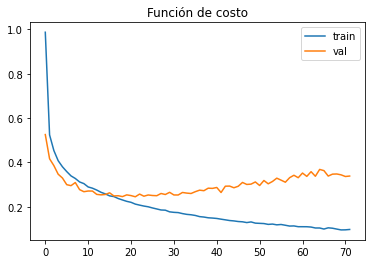

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history6.history['loss'], label='train')
plt.plot(history6.history['val_loss'], label='val')
plt.legend()
plt.show()

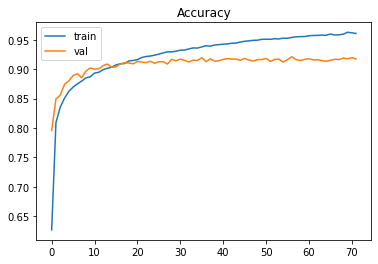

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history6.history['accuracy'], label='train')
plt.plot(history6.history['val_accuracy'], label='val')
plt.legend()
plt.show()

PREDICCIÓN

Si la predicción coincide con la etiqueta verdadera, el título será verde, de lo contrario, se muestra en rojo

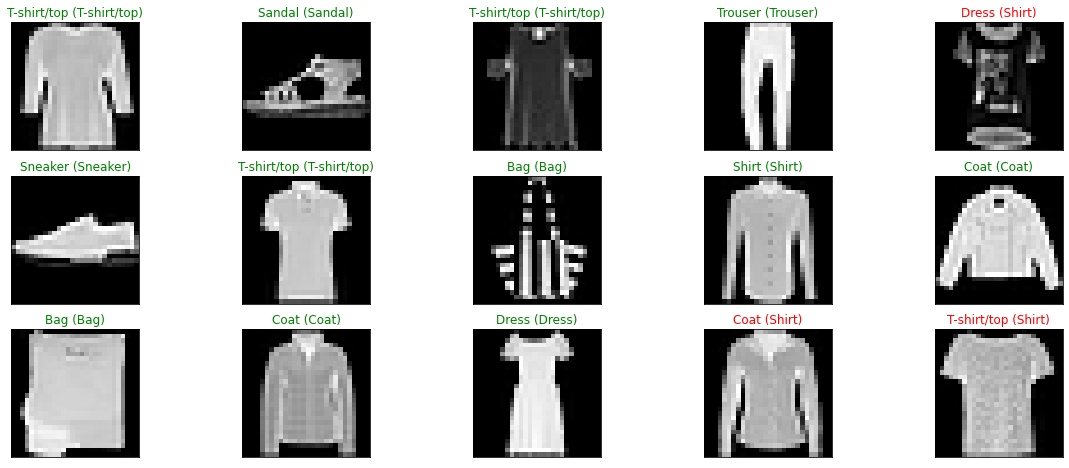

In [ ]:
prediction = model6.predict(x_test)

# Graficar 10 imagenes del conjunto de prueba con sus etiquetas predichas versus las realeas
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    #Descargar cada imagen
    ax.imshow(np.squeeze(x_test[index]),cmap=plt.get_cmap('gray'))
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(y_test[index])
    # Establecer el título de cada imagen
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

MODELO 7

In [ ]:
### DEFINICIÓN MODELO 7                                                   
from keras.layers import  MaxPooling2D, Activation, Dropout

model7 = Sequential()

model7.add(Conv2D(32, kernel_size=3,padding='same', activation='relu', input_shape=(28,28,1)))
model7.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model7.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(0.5))
model7.add(Dense(n_class, activation='softmax'))

print(model7.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)              

In [ ]:
## COMPLILAR MODELO 7
model7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Cargar en Carpeta "model_CNN77.hdf5" los pesos guardados 
model_path = PATH+"model_CNN77.hdf5" 

In [ ]:
# DEFINICIÓN CALLBACKS ------> SE ADICIONA EarlyStopping
          ## ModelCheckpoint
          ## EarlyStopping

# Definición del CALLBACKS:ModelCheckpoint
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='min')

# Definición del CALLBACK: EarlyStopping
earlystopping = EarlyStopping(monitor='val_loss', 
                              min_delta=0, 
                              patience=50, 
                              mode='min',
                              restore_best_weights=True)

#Generar Lista de Callback
callback_list = [checkpoint,earlystopping]

In [ ]:
train_steps = x_train.shape[0] // batch_size
val_steps = x_val.shape[0] // batch_size

epochs = 500

history7 = model7.fit(
            train_generator, 
            steps_per_epoch=train_steps,
            validation_data=val_generator,
            validation_steps=val_steps,
            epochs=epochs,  
            verbose=1,
            callbacks=callback_list
          )

Epoch 1/500
776/781 [============================>.] - ETA: 0s - loss: 1.0670 - accuracy: 0.5971
Epoch 00001: val_loss improved from inf to 0.52365, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN77.hdf5
781/781 [==============================] - 9s 12ms/step - loss: 1.0639 - accuracy: 0.5982 - val_loss: 0.5237 - val_accuracy: 0.8091
Epoch 2/500
778/781 [============================>.] - ETA: 0s - loss: 0.5075 - accuracy: 0.8138
Epoch 00002: val_loss improved from 0.52365 to 0.41062, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN77.hdf5
781/781 [==============================] - 9s 12ms/step - loss: 0.5073 - accuracy: 0.8139 - val_loss: 0.4106 - val_accuracy: 0.8454
Epoch 3/500
780/781 [============================>.] - ETA: 0s - loss: 0.4377 - accuracy: 0.8391
Epoch 00003: val_loss improved from 0.41062 to 0.36743, saving model to /content/drive/My Drive/ML_Practicas_2020/model_CNN77.hdf5
781/781 [==============================] - 10s 13ms/step

In [ ]:
_, train_acc7 = model7.evaluate(x_train, y_train, verbose=0)
_, val_acc7 = model7.evaluate(x_val, y_val, verbose=0)
_, test_acc7 = model7.evaluate(x_test, y_test, verbose=0)
print('Train: {}%\nVal: {}%\nTest: {}%'.format(round(train_acc7*100,2), round(val_acc7*100, 2), round(test_acc7*100, 2)))

Train: 87.03%
Val: 84.99%
Test: 83.83%


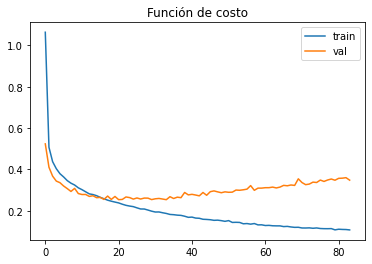

In [ ]:
# Función de costo
plt.figure()
plt.title('Función de costo')
plt.plot(history7.history['loss'], label='train')
plt.plot(history7.history['val_loss'], label='val')
plt.legend()
plt.show()

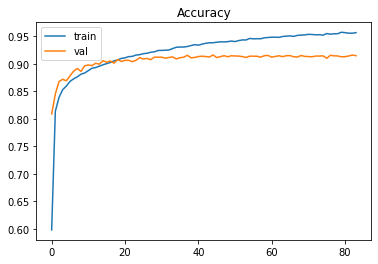

In [ ]:
# Accuracy
plt.figure()
plt.title('Accuracy')
plt.plot(history7.history['accuracy'], label='train')
plt.plot(history7.history['val_accuracy'], label='val')
plt.legend()
plt.show()

PREDICCIÓN

Si la predicción coincide con la etiqueta verdadera, el título será verde, de lo contrario, se muestra en rojo

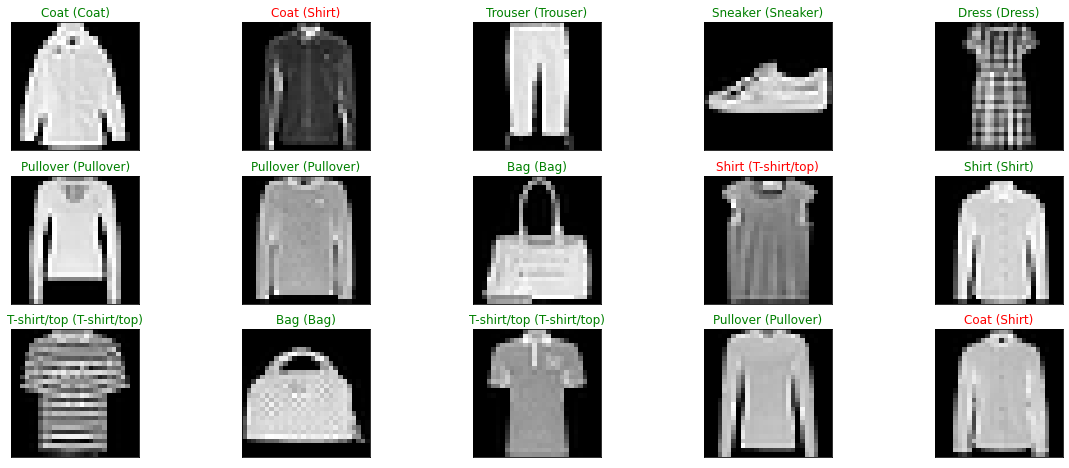

In [ ]:
prediction = model7.predict(x_test)

# Graficar 10 imagenes del conjunto de prueba con sus etiquetas predichas versus las realeas
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    #Descargar cada imagen
    ax.imshow(np.squeeze(x_test[index]),cmap=plt.get_cmap('gray'))
    predict_index = np.argmax(prediction[index])
    true_index = np.argmax(y_test[index])
    # Establecer el título de cada imagen
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))